In [240]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [241]:
dataset_path = "original"

image_files = [
    f for f in os.listdir(dataset_path)
    if f.lower().endswith(".gif")
]

print("Jumlah shape:", len(image_files))


Jumlah shape: 1402


(np.float64(-0.5), np.float64(495.5), np.float64(501.5), np.float64(-0.5))

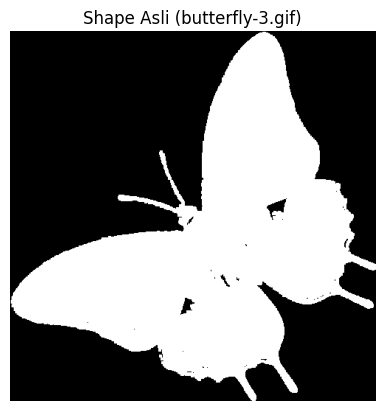

In [242]:
filename = image_files[2]
img_path = os.path.join(dataset_path, filename)

# Baca GIF dengan PIL
img_pil = Image.open(img_path).convert("L")

# Konversi ke numpy array
img = np.array(img_pil)

plt.imshow(img, cmap="gray")
plt.title(f"Shape Asli ({filename})")
plt.axis("off")


(np.float64(-0.5), np.float64(495.5), np.float64(501.5), np.float64(-0.5))

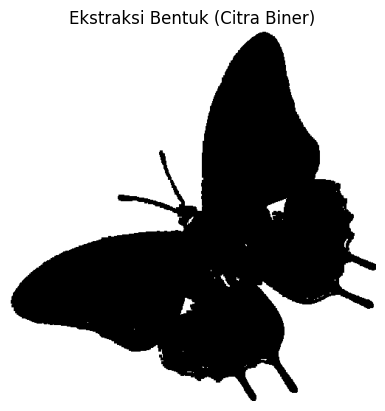

In [243]:
_, binary = cv2.threshold(
    img, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

plt.imshow(binary, cmap="gray")
plt.title("Ekstraksi Bentuk (Citra Biner)")
plt.axis("off")


(np.float64(-0.5), np.float64(495.5), np.float64(501.5), np.float64(-0.5))

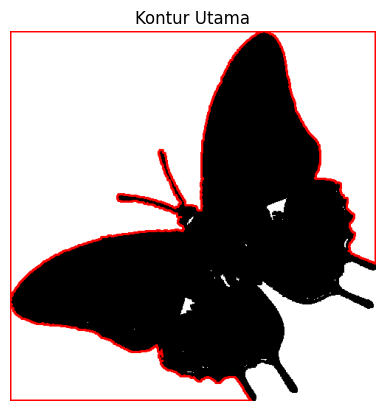

In [244]:
contours, _ = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)

cnt = max(contours, key=cv2.contourArea)

contour_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_img, [cnt], -1, (255,0,0), 2)

plt.imshow(contour_img)
plt.title("Kontur Utama")
plt.axis("off")


In [245]:
M = cv2.moments(cnt)

print("RAW MOMENTS")
print("m00 (luas):", M["m00"])
print("m10:", M["m10"])
print("m01:", M["m01"])


RAW MOMENTS
m00 (luas): 124164.5
m10: 23756965.333333332
m01: 23675385.166666664


In [246]:
print("CENTRAL MOMENTS")
print("mu20:", M["mu20"])
print("mu02:", M["mu02"])
print("mu11:", M["mu11"])


CENTRAL MOMENTS
mu20: 2718832013.0497923
mu02: 2703969935.9884157
mu11: -755880081.5941253


In [247]:
print("NORMALIZED MOMENTS")
print("nu20:", M["nu20"])
print("nu02:", M["nu02"])
print("nu11:", M["nu11"])


NORMALIZED MOMENTS
nu20: 0.17635488209369796
nu02: 0.1753908652529199
nu11: -0.049029561968772305


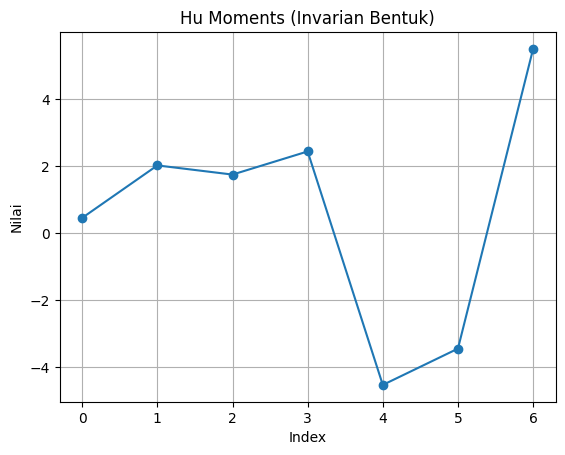

In [248]:
hu = cv2.HuMoments(M)

for i in range(len(hu)):
    if hu[i] != 0:
        hu[i] = -np.sign(hu[i]) * np.log10(abs(hu[i]))

plt.plot(hu.flatten(), marker='o')
plt.title("Hu Moments (Invarian Bentuk)")
plt.xlabel("Index")
plt.ylabel("Nilai")
plt.grid()


(np.float64(-0.5), np.float64(495.5), np.float64(501.5), np.float64(-0.5))

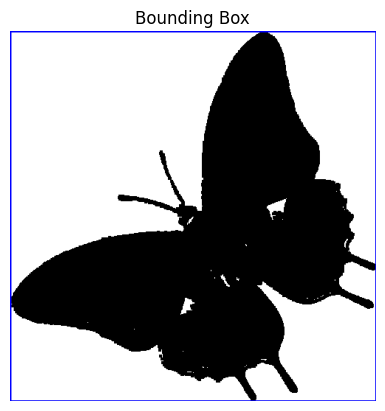

In [249]:
x, y, w, h = cv2.boundingRect(cnt)

bbox_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2.rectangle(bbox_img, (x,y), (x+w,y+h), (0,0,255), 2)

plt.imshow(bbox_img)
plt.title("Bounding Box")
plt.axis("off")


(np.float64(-0.5), np.float64(495.5), np.float64(501.5), np.float64(-0.5))

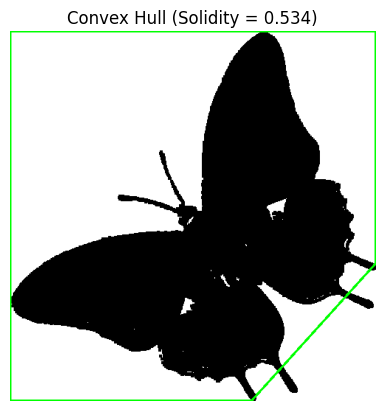

In [250]:
hull = cv2.convexHull(cnt)

area = cv2.contourArea(cnt)
solidity = area / cv2.contourArea(hull)

hull_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2.drawContours(hull_img, [hull], -1, (0,255,0), 2)

plt.imshow(hull_img)
plt.title(f"Convex Hull (Solidity = {solidity:.3f})")
plt.axis("off")


(np.float64(-0.5), np.float64(495.5), np.float64(501.5), np.float64(-0.5))

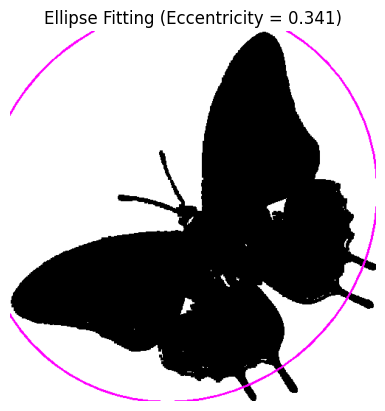

In [251]:
ellipse = cv2.fitEllipse(cnt)
(_, axes, _) = ellipse

a = max(axes) / 2
b = min(axes) / 2

eccentricity = np.sqrt(1 - (b**2 / a**2))

ellipse_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2.ellipse(ellipse_img, ellipse, (255,0,255), 2)

plt.imshow(ellipse_img)
plt.title(f"Ellipse Fitting (Eccentricity = {eccentricity:.3f})")
plt.axis("off")
